Example 1: K Nearest Neighbours
    In this page we will recap the complexity of KNN decision boundaries with varying values of K

In [2]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

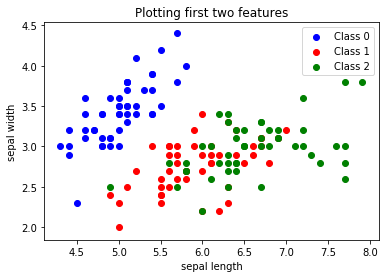

In [3]:
# loading iris dataset
iris = datasets.load_iris()

# considering the first two features
X = iris.data[:, :2]
y = iris.target

# plotting the data
plt.title('Plotting first two features')
plt.scatter(X[0:49,0], X[0:49,1], color = 'b', label = 'Class 0')
plt.scatter(X[50:99,0], X[50:99,1], color = 'r', label = 'Class 1')
plt.scatter(X[100:149,0], X[100:149,1], color = 'g', label = 'Class 2')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [4]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, tr, **params):
    if tr == True:
        Z = clf.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    else:  
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

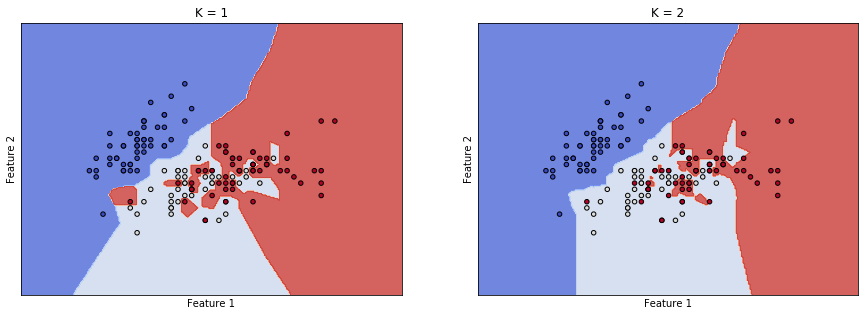

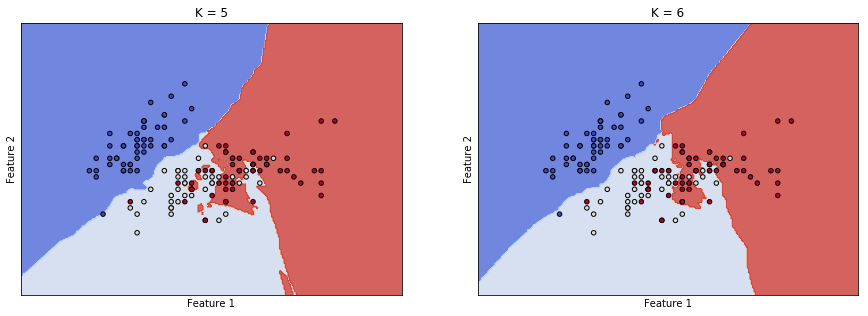

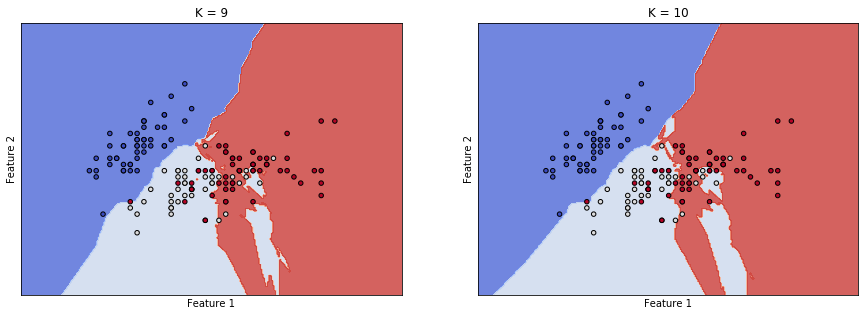

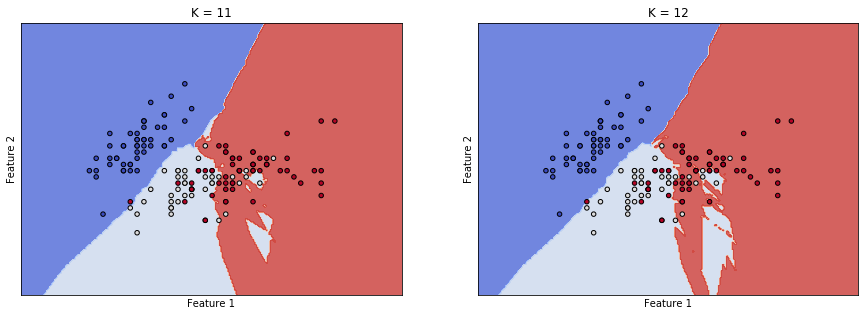

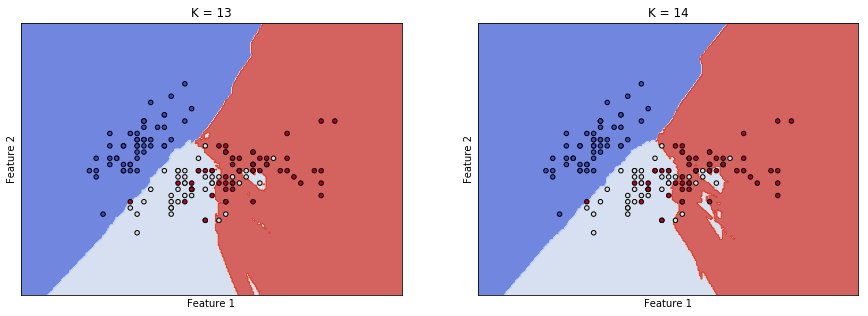

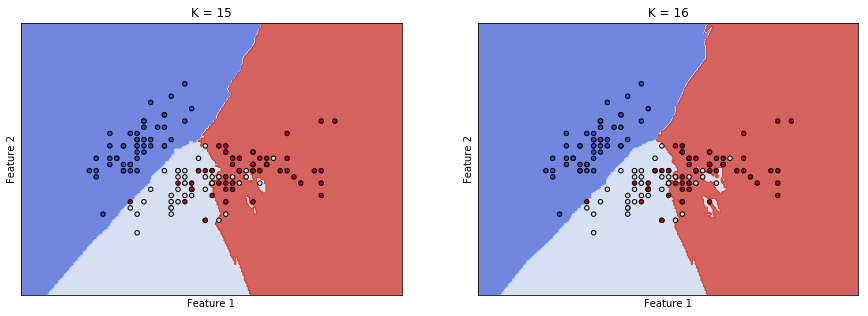

In [5]:
for i in range(8):
    # Create K-NN classifiers
    knn1 = KNeighborsClassifier(n_neighbors=i*2 + 1)
    knn2 = KNeighborsClassifier(n_neighbors=i*2 + 2)
    
    # Train the models using the data
    knn1.fit(X, y)
    knn2.fit(X, y)
        
    # Plotting decision surface

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    #ax = plt.gca()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

    plot_contours(ax1, knn1, xx, yy, False, cmap=plt.cm.coolwarm, alpha=0.8)
    ax1.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax1.set_xlim(xx.min(), xx.max())
    ax1.set_ylim(yy.min(), yy.max())
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_xticks(())
    ax1.set_yticks(())
    ax1.set_title('K = ' + str( i * 2 + 1 ))

    plot_contours(ax2, knn2, xx, yy, False, cmap=plt.cm.coolwarm, alpha=0.8)
    ax2.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax2.set_xlim(xx.min(), xx.max())
    ax2.set_ylim(yy.min(), yy.max())
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    ax2.set_xticks(())
    ax2.set_yticks(())
    ax2.set_title('K = ' + str( i * 2 + 2 ))

    plt.show()   

In [9]:
# define function for creating & plotting synthetic data set
def generate_2class_data(class1Mean, class1Cov, class2Mean, class2Cov, seedValue, plot=True):
    
    np.random.seed(seedValue)
    class1x = np.random.multivariate_normal(class1Mean, class1Cov, 100)
    class1y = np.zeros(100)
    class2x = np.random.multivariate_normal(class2Mean, class2Cov, 100)
    class2y = np.ones(100)
    
    X = np.concatenate((class1x, class2x), axis=0)
    y = np.concatenate((class1y, class2y))

    # Plotting the 2-class data
    if(plot):
        plt.title('Plotting 2-dimensional 2-class data')
        plt.scatter(class1x[:,0], class1x[:,1], color = 'b', label = 'Class 0')
        plt.scatter(class2x[:,0], class2x[:,1], color = 'r', label = 'Class 1')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()
        
    return X,y

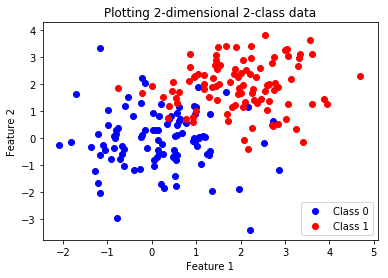

In [10]:
class1Mean = [0, 0]
class2Mean = [2, 2]

class1Cov = [[1, 0], [0, 1]]
class2Cov = [[1, 0], [0, 1]]

X, y = generate_2class_data( class1Mean, class1Cov, class2Mean, class2Cov, seedValue = 17)

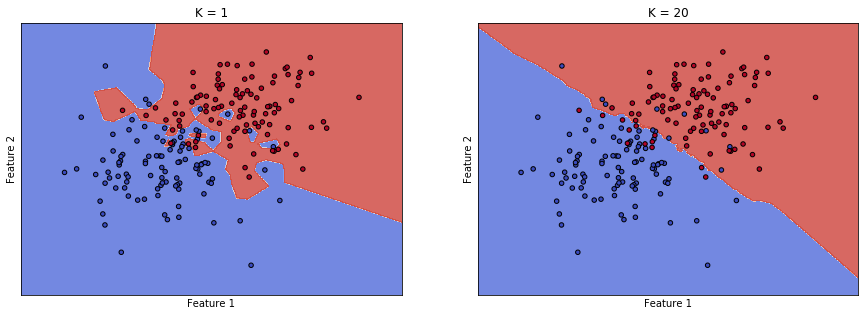

In [11]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn2 = KNeighborsClassifier(n_neighbors=20)
    
# Train the models using the data
knn1.fit(X, y)
knn2.fit(X, y)
        
# Plotting decision surface

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

#ax = plt.gca()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

plot_contours(ax1, knn1, xx, yy, False, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('K = 1')

plot_contours(ax2, knn2, xx, yy, False, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('K = 20')

plt.show()

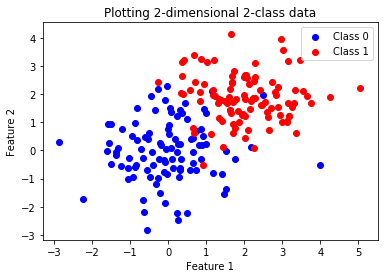

In [12]:
X, y = generate_2class_data( class1Mean, class1Cov, class2Mean, class2Cov, 28)

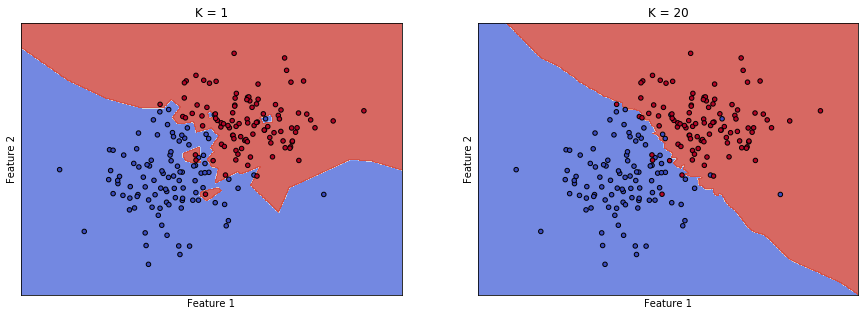

In [13]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn2 = KNeighborsClassifier(n_neighbors=20)
    
# Train the models using the data
knn1.fit(X, y)
knn2.fit(X, y)
        
# Plotting decision surface

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

#ax = plt.gca()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

plot_contours(ax1, knn1, xx, yy, False, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('K = 1')

plot_contours(ax2, knn2, xx, yy, False, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('K = 20')

plt.show()